## Geometric Transformations on Images

### 1) Resizing/Scaling 

<ol> 
<p>Interpolation Methods:-</p>
 <li> cv2.INTER_AREA  - For shrinking</li>
 <li> cv2.INTER_CUBIC  - Slow in processing</li> 
 <li> cv2.INTER_LINEAR  - For zooming(by default)</li>
</ol>

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.util import invert, random_noise

In [44]:
img = cv2.imread('C:/Users/tajmahal.jpeg')
img.shape

(1032, 774, 3)

In [45]:
img.shape[:2]

(1032, 774)

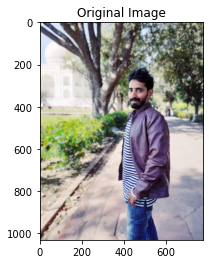

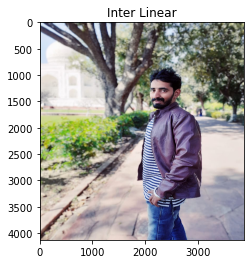

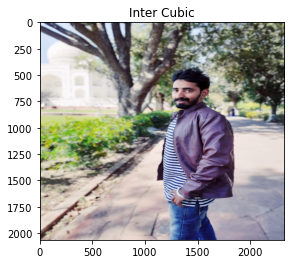

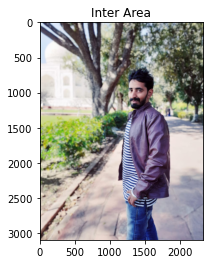

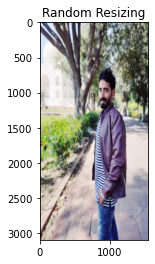

In [47]:
img = cv2.imread('C:/Users/tajmahal.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
res1 = cv2.resize(img,None,fx=5, fy=4, interpolation = cv2.INTER_LINEAR)
res2 = cv2.resize(img,None,fx=3, fy=2, interpolation = cv2.INTER_CUBIC)
res3 = cv2.resize(img,None,fx=3, fy=3, interpolation = cv2.INTER_AREA)
h,w = img.shape[:2]
res4 = cv2.resize(img,(2*w, 3*h), interpolation = cv2.INTER_CUBIC)


plt.imshow(img),plt.title('Original Image'),plt.show()
plt.imshow(res1),plt.title('Inter Linear'),plt.show()
plt.imshow(res2),plt.title('Inter Cubic'), plt.show()
plt.imshow(res3),plt.title('Inter Area'),plt.show()
plt.imshow(res4),plt.title('Random Resizing'),plt.show()
plt.show()

### 2) Translation

<p> Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (𝑡𝑥, 𝑡𝑦),
you can create the transformation matrix M as follows:<br>
<div>𝑀 =<br>   
    <span>[︂1 0 𝑡𝑥</span><br>
     <span> 0 1 𝑡𝑦]︂</span><br>
    </div>
 <b>cv2.warpAffine() </b>- Make a Numpy array of type np.float32  for the matrix M and pass it in this function</p>

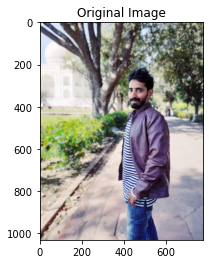

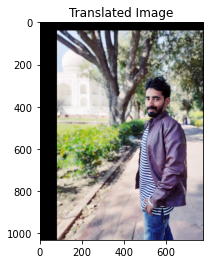

In [48]:
img = cv2.imread('C:/Users/tajmahal.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows,cols = img.shape[:2]
# tx = 80 and ty= 40
M = np.float32([[1,0,80],[0,1,40]])  
# warpAffine(src, M, size of output)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(img)
plt.title('Original Image'),plt.show()
plt.imshow(dst)
plt.title('Translated Image')
plt.show()

### 3) Rotation

<p>Rotation of an image for an angle 𝜃 is achieved by the transformation matrix of the form<br>
𝑀 =<br>[︂𝑐𝑜𝑠𝜃 −𝑠𝑖𝑛𝜃<br>
    𝑠𝑖𝑛𝜃 𝑐𝑜𝑠𝜃]︂<br>
<b> cv2.getRotationMatrix2D</b> - is used to find the transformation matrix.    
    </p>

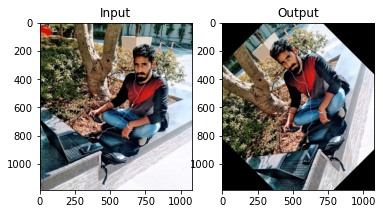

In [49]:
img = cv2.imread('C:/Users//laptop.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows,cols = img.shape[:2]

# Takes three values ((center),angle,scale)
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)  

# warpAffine(src, M, size of output)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 4) Affine Transformation

<div>
<p>In affine transformation, all parallel lines in the original image will still be parallel in the output image.
To find the transformation matrix, we need three points from input image and their corresponding locations in
output image. </p>
<b>cv2.getAffineTransform</b> - creates a 2x3 matrix which is to be passed to cv2.warpAffine.
    </div>

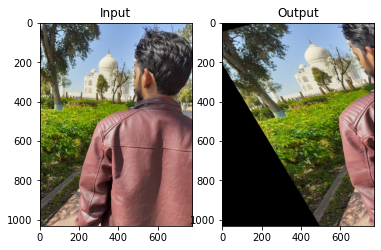

In [50]:
img = cv2.imread('C:/Users/tejomahal.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 5) Perspective Transformation

<p>
Straight lines will remain straight even after the transformation. To find this transformation matrix, we need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function <b> cv2.getPerspectiveTransform. </b>
Then apply <b>cv2.warpPerspective()</b> with this 3x3 transformation matrix.
</p>

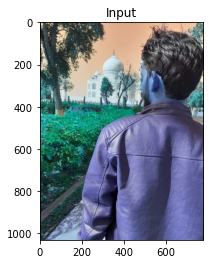

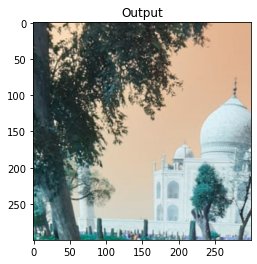

In [51]:
img = cv2.imread('C:/Users/tejomahal.jpeg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.imshow(img),plt.title('Input'),plt.show()
plt.imshow(dst),plt.title('Output')
plt.show()

## Image Filtering

### 1) Image Blurring/ Smoothing

<table align="left">
<tr><th>Filter Name</th><th>Description</th><th>Function used</th></tr>

<tr><th>Averaging</th>
<td align="left">This is done by convolving the image with a normalized box filter. It takes the average<br> of all the pixels under kernel area and replaces the central element with this average.</td><td align="left"><b>
cv2.blur(src, ksize, dst, anchor, borderType)</b></td></tr>

<tr><th>Gaussion Smoothing</th>
<td align="left">A Gaussian kernel is used. Highly effective in removing salt-and-pepper noise.<br></td>
<td align="left"><b>cv2.GaussianBlur(src, ksize, sigmaX, dst, sigmaY, borderType)</b></td></tr>

<tr align="left"><th>Median Filtering</th>
<td align="left">Computes the median of all the pixels under the kernel window and the central<br>
pixel is replaced with this median value.It reduces the noise effectively. </td><td align="left"><b>medianBlur(src, ksize, dst)</b></td><tr>

<tr><th>Bilateral Filtering</th>
<td align="left">Removes Noise while preserving edges.</td><td align="left"><b>cv2.medianBlur(src, d, sigmaColor, sigmaSpace, dst, borderType)</b></td></tr>
</table>    

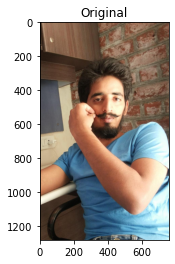

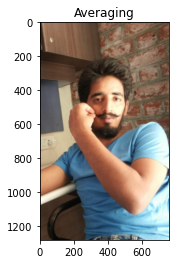

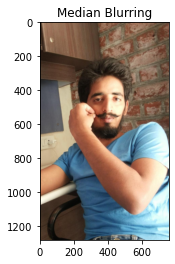

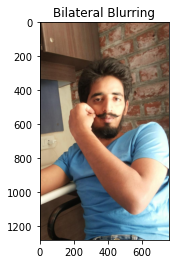

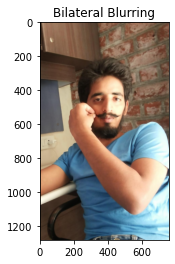

In [52]:
img = cv2.imread('C:/Users/mushtak.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# blur(image, blurring kernel size)
blur1 = cv2.blur(img,(5,5))
blur2 = cv2.GaussianBlur(img,(5,5),0)
blur3 = cv2.medianBlur(img,5)
blur4 = cv2.bilateralFilter(img,9,75,75)

plt.imshow(img),plt.title('Original'),plt.show()
plt.imshow(blur1),plt.title('Averaging'),plt.show()
plt.imshow(blur2),plt.title('Median Blurring'),plt.show()
plt.imshow(blur3),plt.title('Bilateral Blurring'),plt.show()
plt.imshow(blur4),plt.title('Bilateral Blurring'),plt.show()
plt.show()

### 2) Image Adding noise to Images

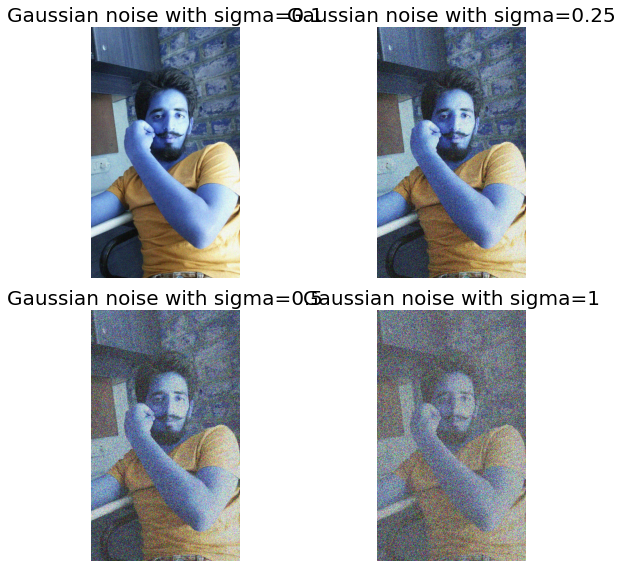

In [53]:
im = img_as_float(cv2.imread("C:/Users/mushtak.jpeg"))
plt.figure(figsize=(10,8))
sigmas = [0.1, 0.25, 0.5, 1]
for i in range(4):
    noisy = random_noise(im, var=sigmas[i]**2)
    plt.subplot(2,2,i+1)
    plt.imshow(noisy)
    plt.axis('off')
    plt.title('Gaussian noise with sigma=' + str(sigmas[i]), size=20)
plt.tight_layout()
plt.show()